## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime
from datetime import datetime
import math

import sys
import os

pd.options.mode.chained_assignment = None

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None)

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
np.random.seed(311)

In [3]:
print(sys.version)

3.11.5 (main, Sep 11 2023, 08:19:27) [Clang 14.0.6 ]


## Load Data

In [4]:
current_file_path = os.path.dirname(os.path.realpath('__file__'))
current_folder_name = 'code'

project_base_path = current_file_path.removesuffix(current_folder_name)
temperature_filepath = project_base_path + '/data/input/temperature data.xlsx'

In [5]:
temperature_df = pd.read_excel(
    temperature_filepath, 
    header = 1
)

temperature_df.head()

,Date,Time,Date/time,Room A,GSW+FM,AFLN+MU,AFLN+FB,AFLH+FM,AFLH+MU,AFLH,GSW+FB,AFLN+FM,GSW+MU,AFLH+FB,Room B,GSW+MU.1,AFLH.1,AFLH+FB.1,GSW+FM.1,AFLH+MU.1,AFLN+FM.1,GSW+FB.1,AFLN+FB.1,AFLH+FM.1,AFLN+MU.1,Room C,AFLH+FM.2,GSW+FB.2,GSW+MU.2,AFLN+FM.2,GSW+FM.2,AFLH.2,AFLN+MU.2,AFLN+FB.2,AFLH+FB.2,AFLH+MU.2
0,2023-02-01,22:00:00,2023-02-01 22:00:00,20.5,15.2,13.3,13.7,15.3,15.6,17.7,15.1,13.8,14.5,21.9,20.4,14.2,17.3,15.3,15.1,15.1,13.4,14.7,13.4,15.1,12.9,20.7,18.1,14.5,19.4,13.4,14.8,16.9,12.7,13.5,15.0,14.8
1,2023-02-01,23:00:00,2023-02-01 23:00:00,20.8,15.2,13.4,13.8,15.4,15.7,17.8,15.1,13.9,14.5,21.9,20.5,14.2,17.4,15.3,15.1,15.2,13.5,14.7,13.5,15.2,13.0,20.9,18.1,14.6,19.4,13.5,14.9,17.0,12.8,13.6,15.1,14.8
2,2023-02-02,00:00:00,2023-02-02 00:00:00,21.0,15.2,13.5,14.0,15.5,15.8,17.9,15.2,14.1,14.6,22.0,20.7,14.3,17.5,15.4,15.1,15.2,13.6,14.8,13.6,15.2,13.0,21.1,18.2,14.6,19.4,13.7,14.9,17.2,12.9,13.7,15.1,14.9
3,2023-02-02,01:00:00,2023-02-02 01:00:00,21.1,15.3,13.5,14.1,15.6,15.8,18.0,15.2,14.2,14.6,22.1,20.8,14.3,17.6,15.5,15.2,15.3,13.7,14.8,13.7,15.3,13.1,21.2,18.2,14.6,19.5,13.8,14.9,17.3,13.0,13.8,15.2,15.0
4,2023-02-02,02:00:00,2023-02-02 02:00:00,21.3,15.3,13.7,14.2,15.7,15.9,18.0,15.2,14.4,14.7,22.1,21.0,14.4,17.7,15.6,15.2,15.4,13.9,14.8,13.9,15.4,13.2,21.4,18.3,14.7,19.5,14.0,15.0,17.4,13.2,13.9,15.3,15.1


In [6]:
temperature_df.shape

(2154, 36)

In [7]:
print('Columns:\n')
print(*temperature_df.columns, sep = ' ')

Columns:

Date Time Date/time Room A GSW+FM AFLN+MU AFLN+FB AFLH+FM AFLH+MU AFLH GSW+FB AFLN+FM GSW+MU AFLH+FB Room B GSW+MU.1 AFLH.1 AFLH+FB.1 GSW+FM.1 AFLH+MU.1 AFLN+FM.1 GSW+FB.1 AFLN+FB.1 AFLH+FM.1 AFLN+MU.1 Room C AFLH+FM.2 GSW+FB.2 GSW+MU.2 AFLN+FM.2 GSW+FM.2 AFLH.2 AFLN+MU.2 AFLN+FB.2 AFLH+FB.2 AFLH+MU.2


## Transform Dataframe for organizing blocks(bottles) better

Split dataset into subsets per each block(bottle)

In [8]:
temperature_df_subset_A = temperature_df[
    [
        'Date', 'Time', 'Date/time', 'Room A', 
        'GSW+FM', 'AFLN+MU', 'AFLN+FB',
       'AFLH+FM', 'AFLH+MU', 'AFLH', 
        'GSW+FB', 'AFLN+FM', 'GSW+MU', 'AFLH+FB'
    ]
]

temperature_df_subset_B = temperature_df[
    [
        'Date', 'Time', 'Date/time', 'Room B', 
        'GSW+MU.1', 'AFLH.1', 'AFLH+FB.1', 
        'GSW+FM.1', 'AFLH+MU.1', 'AFLN+FM.1', 
        'GSW+FB.1', 'AFLN+FB.1', 'AFLH+FM.1', 'AFLN+MU.1'
    ]
]

temperature_df_subset_C = temperature_df[
    [
        'Date', 'Time', 'Date/time', 'Room C', 
        'AFLH+FM.2', 'GSW+FB.2', 'GSW+MU.2', 
        'AFLN+FM.2', 'GSW+FM.2', 'AFLH.2', 
        'AFLN+MU.2', 'AFLN+FB.2', 'AFLH+FB.2', 'AFLH+MU.2'
    ]
]

In [9]:
temperature_df_subset_A.head()

,Date,Time,Date/time,Room A,GSW+FM,AFLN+MU,AFLN+FB,AFLH+FM,AFLH+MU,AFLH,GSW+FB,AFLN+FM,GSW+MU,AFLH+FB
0,2023-02-01,22:00:00,2023-02-01 22:00:00,20.5,15.2,13.3,13.7,15.3,15.6,17.7,15.1,13.8,14.5,21.9
1,2023-02-01,23:00:00,2023-02-01 23:00:00,20.8,15.2,13.4,13.8,15.4,15.7,17.8,15.1,13.9,14.5,21.9
2,2023-02-02,00:00:00,2023-02-02 00:00:00,21.0,15.2,13.5,14.0,15.5,15.8,17.9,15.2,14.1,14.6,22.0
3,2023-02-02,01:00:00,2023-02-02 01:00:00,21.1,15.3,13.5,14.1,15.6,15.8,18.0,15.2,14.2,14.6,22.1
4,2023-02-02,02:00:00,2023-02-02 02:00:00,21.3,15.3,13.7,14.2,15.7,15.9,18.0,15.2,14.4,14.7,22.1


Transform columns into a common style:

Add a column indicating a block

In [10]:
temperature_df_subset_A['Block'] = 'A'
temperature_df_subset_B['Block'] = 'B'
temperature_df_subset_C['Block'] = 'C'

Remove block indicator

In [11]:
temperature_df_subset_A = temperature_df_subset_A.rename(columns = {'Room A': 'Room'})
temperature_df_subset_B = temperature_df_subset_B.rename(columns = {'Room B': 'Room'})
temperature_df_subset_C = temperature_df_subset_C.rename(columns = {'Room C': 'Room'})

Remove digits from column names for treatments

In [12]:
def remove_digits_from_column_names(df):
    df.columns = df.columns.str.replace('[\.\d]', '', regex = True)
    
remove_digits_from_column_names(temperature_df_subset_B)
remove_digits_from_column_names(temperature_df_subset_C)

Combine datasets with each block into one

In [13]:
temperature_df_transformed = pd.concat([
    temperature_df_subset_A, 
    temperature_df_subset_B,
    temperature_df_subset_C
], 
    ignore_index = True
)

In [14]:
temperature_df_transformed.head(10)

,Date,Time,Date/time,Room,GSW+FM,AFLN+MU,AFLN+FB,AFLH+FM,AFLH+MU,AFLH,GSW+FB,AFLN+FM,GSW+MU,AFLH+FB,Block
0,2023-02-01,22:00:00,2023-02-01 22:00:00,20.5,15.2,13.3,13.7,15.3,15.6,17.7,15.1,13.8,14.5,21.9,A
1,2023-02-01,23:00:00,2023-02-01 23:00:00,20.8,15.2,13.4,13.8,15.4,15.7,17.8,15.1,13.9,14.5,21.9,A
2,2023-02-02,00:00:00,2023-02-02 00:00:00,21.0,15.2,13.5,14.0,15.5,15.8,17.9,15.2,14.1,14.6,22.0,A
3,2023-02-02,01:00:00,2023-02-02 01:00:00,21.1,15.3,13.5,14.1,15.6,15.8,18.0,15.2,14.2,14.6,22.1,A
4,2023-02-02,02:00:00,2023-02-02 02:00:00,21.3,15.3,13.7,14.2,15.7,15.9,18.0,15.2,14.4,14.7,22.1,A
5,2023-02-02,03:00:00,2023-02-02 03:00:00,21.4,15.4,13.7,14.3,15.8,16.0,18.1,15.3,14.5,14.7,22.2,A
6,2023-02-02,04:00:00,2023-02-02 04:00:00,21.5,15.4,13.8,14.5,15.9,16.1,18.2,15.3,14.6,14.8,22.3,A
7,2023-02-02,05:00:00,2023-02-02 05:00:00,21.6,15.5,14.0,14.6,16.0,16.2,18.3,15.4,14.8,14.9,22.4,A
8,2023-02-02,06:00:00,2023-02-02 06:00:00,21.7,15.5,14.1,14.7,16.1,16.2,18.4,15.4,14.9,14.9,22.4,A
9,2023-02-02,07:00:00,2023-02-02 07:00:00,21.9,15.6,14.2,14.9,16.2,16.3,18.4,15.5,15.0,15.0,22.5,A


## Data Cleaning

Convert Date to a pandas datetime object

In [15]:
temperature_df_transformed['Date'] = pd.to_datetime(
    temperature_df_transformed['Date']
)

temperature_df_transformed['Date/time'] = pd.to_datetime(
    temperature_df_transformed['Date/time']
)

Some records have unrealistic values for Date/time

In [16]:
temperature_df_transformed['Date/time'].min()

Timestamp('1970-01-01 00:00:00.000000045')

In [17]:
temperature_df_transformed[
    temperature_df_transformed['Date/time'] == temperature_df_transformed['Date/time'].min()
].head()

,Date,Time,Date/time,Room,GSW+FM,AFLN+MU,AFLN+FB,AFLH+FM,AFLH+MU,AFLH,GSW+FB,AFLN+FM,GSW+MU,AFLH+FB,Block
2150,NaT,NaN,1970-01-01 00:00:00.000000045,0.0,68.0,209.0,410.0,435.0,0.0,279.0,198.0,678.0,122.0,377.0,A
4304,NaT,NaN,1970-01-01 00:00:00.000000045,0.0,0.0,317.0,529.0,497.0,0.0,0.0,214.0,652.0,140.0,383.0,B
6458,NaT,NaN,1970-01-01 00:00:00.000000045,0.0,0.0,210.0,617.0,465.0,0.0,0.0,173.0,707.0,316.0,382.0,C


Remove the records with unrealistic or missing values for Date and time

In [18]:
n_records_before_cleaning_dates = temperature_df_transformed.shape[0]

In [19]:
temperature_df_transformed.drop(
    temperature_df_transformed[
        temperature_df_transformed['Date/time'] <= np.datetime64('2000-01-01 00:00:00.000000045')
    ].index,
    inplace = True
)

In [20]:
temperature_df_transformed['Date/time'].min()

Timestamp('2023-02-01 22:00:00')

In [21]:
n_records_after_cleaning_dates = temperature_df_transformed.shape[0]

In [22]:
difference = n_records_before_cleaning_dates - n_records_after_cleaning_dates

print(
    f'{difference} rows have been removed'
)

12 rows have been removed


In [23]:
print('Columns:\n')
print(*temperature_df_transformed.columns.tolist(), sep = ' ')

Columns:

Date Time Date/time Room GSW+FM AFLN+MU AFLN+FB AFLH+FM AFLH+MU AFLH GSW+FB AFLN+FM GSW+MU AFLH+FB Block


Column 'Time' is redundant, we can drop it

In [24]:
temperature_df_transformed.drop('Time', axis = 1, inplace = True)

# Data Transformation

We want to have a column counting number of hours as a part of a day from the start of the experiment for visualization

In [25]:
starting_time = temperature_df_transformed['Date/time'].min()

temperature_df_transformed['Relative_time'] = temperature_df_transformed[
    'Date/time'
] - starting_time

temperature_df_transformed['Hours'] = (
    (
        temperature_df_transformed[
            'Relative_time'
        ].dt.days
    ) * 24 + (
        temperature_df_transformed[
            'Relative_time'
        ].dt.components['hours']
    ) + 1
) / 24

And we want to have a column counting number of days from the start of the experiment for taking an average per day

In [26]:
starting_day = temperature_df_transformed['Date'].min()

temperature_df_transformed['Day'] = (
    temperature_df_transformed['Date'] - starting_day
).dt.days.astype(int)

temperature_df_transformed.drop('Date', axis = 1, inplace = True)

temperature_df_transformed.head()

,Date/time,Room,GSW+FM,AFLN+MU,AFLN+FB,AFLH+FM,AFLH+MU,AFLH,GSW+FB,AFLN+FM,GSW+MU,AFLH+FB,Block,Relative_time,Hours,Day
0,2023-02-01 22:00:00,20.5,15.2,13.3,13.7,15.3,15.6,17.7,15.1,13.8,14.5,21.9,A,0 days 00:00:00,0.041667,0
1,2023-02-01 23:00:00,20.8,15.2,13.4,13.8,15.4,15.7,17.8,15.1,13.9,14.5,21.9,A,0 days 01:00:00,0.083333,0
2,2023-02-02 00:00:00,21.0,15.2,13.5,14.0,15.5,15.8,17.9,15.2,14.1,14.6,22.0,A,0 days 02:00:00,0.125000,1
3,2023-02-02 01:00:00,21.1,15.3,13.5,14.1,15.6,15.8,18.0,15.2,14.2,14.6,22.1,A,0 days 03:00:00,0.166667,1
4,2023-02-02 02:00:00,21.3,15.3,13.7,14.2,15.7,15.9,18.0,15.2,14.4,14.7,22.1,A,0 days 04:00:00,0.208333,1


We want to get averages per block for each experiment

In [27]:
columns = temperature_df_transformed.columns.tolist()
columns.remove('Block')

temperature_df_transformed_average = temperature_df_transformed[
    columns
].groupby(['Date/time']).mean()
temperature_df_transformed_average['Block'] = 'Avr'

In [28]:
temperature_df_transformed.drop('Date/time', axis = 1, inplace = True)

temperature_df_transformed = pd.concat([
    temperature_df_transformed, 
    temperature_df_transformed_average
], 
    ignore_index = True)

In [29]:
temperature_df_transformed.head(48)

,Room,GSW+FM,AFLN+MU,AFLN+FB,AFLH+FM,AFLH+MU,AFLH,GSW+FB,AFLN+FM,GSW+MU,AFLH+FB,Block,Relative_time,Hours,Day
0,20.5,15.2,13.3,13.7,15.3,15.6,17.7,15.1,13.8,14.5,21.9,A,0 days 00:00:00,0.041667,0.0
1,20.8,15.2,13.4,13.8,15.4,15.7,17.8,15.1,13.9,14.5,21.9,A,0 days 01:00:00,0.083333,0.0
2,21.0,15.2,13.5,14.0,15.5,15.8,17.9,15.2,14.1,14.6,22.0,A,0 days 02:00:00,0.125000,1.0
3,21.1,15.3,13.5,14.1,15.6,15.8,18.0,15.2,14.2,14.6,22.1,A,0 days 03:00:00,0.166667,1.0
4,21.3,15.3,13.7,14.2,15.7,15.9,18.0,15.2,14.4,14.7,22.1,A,0 days 04:00:00,0.208333,1.0
5,21.4,15.4,13.7,14.3,15.8,16.0,18.1,15.3,14.5,14.7,22.2,A,0 days 05:00:00,0.250000,1.0
6,21.5,15.4,13.8,14.5,15.9,16.1,18.2,15.3,14.6,14.8,22.3,A,0 days 06:00:00,0.291667,1.0
7,21.6,15.5,14.0,14.6,16.0,16.2,18.3,15.4,14.8,14.9,22.4,A,0 days 07:00:00,0.333333,1.0
8,21.7,15.5,14.1,14.7,16.1,16.2,18.4,15.4,14.9,14.9,22.4,A,0 days 08:00:00,0.375000,1.0
9,21.9,15.6,14.2,14.9,16.2,16.3,18.4,15.5,15.0,15.0,22.5,A,0 days 09:00:00,0.416667,1.0


And here we get an average per day

In [30]:
# we go through each block
# select subset with that block 
# group by per day to calculate mean
# then we combine sabsets with each block vertically

blocks = set(temperature_df_transformed['Block'].tolist())
print(blocks)

subsets_per_block = []

for block in blocks:
    subset = temperature_df_transformed.loc[
        temperature_df_transformed['Block'] == block
    ]
    
    columns = subset.columns.tolist()
    columns.remove('Block')
    
    subset = subset[columns]
    
    subset = subset.groupby(['Day']).mean()
    
    subset['Block'] = block   
    subsets_per_block.append(subset)
    
temperature_df_transformed = pd.concat(subsets_per_block)

{'A', 'C', 'Avr', 'B'}


In [31]:
temperature_df_transformed.head(48)

,Room,GSW+FM,AFLN+MU,AFLN+FB,AFLH+FM,AFLH+MU,AFLH,GSW+FB,AFLN+FM,GSW+MU,AFLH+FB,Relative_time,Hours,Block
Day,,,,,,,,,,,,,,
0.0,20.650000,15.200000,13.350000,13.750000,15.350000,15.650000,17.750000,15.100000,13.850000,14.500000,21.900000,0 days 00:30:00,0.062500,A
1.0,21.962500,15.950000,14.662500,15.479167,16.595833,16.691667,18.687500,15.841667,15.633333,15.420833,18.912500,0 days 13:30:00,0.604167,A
2.0,21.616667,17.579167,17.041667,20.204167,18.791667,18.850000,20.700000,17.458333,20.404167,17.279167,18.416667,1 days 13:30:00,1.604167,A
3.0,20.841667,18.425000,21.454167,31.091667,25.054167,25.254167,28.825000,18.320833,38.566667,18.270833,23.891667,2 days 13:30:00,2.604167,A
4.0,22.195833,18.950000,27.762500,40.779167,35.320833,32.725000,36.979167,18.837500,53.525000,18.825000,35.250000,3 days 13:30:00,3.604167,A
5.0,20.879167,20.120833,31.812500,49.304167,41.737500,37.270833,42.220833,19.654167,58.062500,19.662500,42.595833,4 days 13:30:00,4.604167,A
6.0,19.258333,21.400000,33.412500,55.037500,45.366667,39.508333,44.912500,19.604167,57.954167,19.816667,46.316667,5 days 13:30:00,5.604167,A
7.0,19.058333,23.641667,33.604167,57.608333,47.687500,40.645833,45.966667,19.345833,59.237500,20.570833,48.216667,6 days 13:30:00,6.604167,A
8.0,19.291667,27.037500,33.204167,57.537500,49.666667,40.979167,46.000000,19.487500,58.462500,22.916667,49.183333,7 days 13:30:00,7.604167,A


## Change of Requirements

We don't need the treatments below anymore due to change of requirements. Therefore we can drop them

In [32]:
not_needed_treatments = ['AFLH+FM', 'AFLH+FB', 'AFLH+MU', 'AFLH']

In [33]:
temperature_df_transformed.drop(
    columns = not_needed_treatments, 
    inplace = True
)

In [34]:
temperature_df_transformed.columns

Index(['Room', 'GSW+FM', 'AFLN+MU', 'AFLN+FB', 'GSW+FB', 'AFLN+FM', 'GSW+MU',
       'Relative_time', 'Hours', 'Block'],
      dtype='object')

We need to change the treatments that begin with “AFLN” to “AF” to correspond to the text in the article

In [35]:
temperature_df_transformed = temperature_df_transformed.rename(
    columns = { 
        'AFLN+MU': 'AF+MU', 
        'AFLN+FB': 'AF+FB', 
        'AFLN+FM': 'AF+FM', 
              }
)

We also need to change the treatments that begin with “GSW” to “GS”

In [36]:
temperature_df_transformed = temperature_df_transformed.rename(
    columns = { 
        'GSW+FM': 'GS+FM', 
        'GSW+FB': 'GS+FB', 
        'GSW+MU': 'GS+MU',
              }
)

## Visualize Temperature

Select treatments to visualize

In [37]:
temperature_columns = [ 
    'AF+FB', 'GS+FB',
    'AF+FM', 'GS+FM', 
    'AF+MU', 'GS+MU'
]

Add colors indicating each block(bottle)

In [38]:
blocks = {
    'A': 'tab:olive', 'B': 'tab:olive', 'C': 'tab:olive', 'Avr': 'tab:orange'
}

Add markers for legend for blocks

In [39]:
def plot_temperature(df, date_column, column, ax, plot_room_temperature):
    
    is_room_temperature_plotted = False
    
    if plot_room_temperature:
        columns = [column, date_column, 'Room']
    else:
        columns = [column, date_column]
    
    for block_name, color in blocks.items():
        
        data = df.loc[
            df['Block'] == block_name, columns
        ]
        
        block_alpha = 1 if block_name == 'Avr' else 0.8
        block_ls = 'solid' if block_name == 'Avr' else 'dotted'
    
        ax.plot(
            date_column, 
            column, 
            data = data, 
            color = color, 
            alpha = block_alpha,
            ls = block_ls
        )
            
        if plot_room_temperature and not is_room_temperature_plotted:

            ax.plot(date_column, 'Room', data = data, color = 'tab:gray')
    
    ax.set_title(column, loc = 'center', fontsize = 'medium')
    ax.set_ylabel('')
    ax.set_xlabel('Days')
    ax.grid(True)
    
    ax.set_ylim([10, 65])
    
    for label in ax.get_xticklabels():
        label.set_ha('right')
        label.set_rotation(30.)
        label.set_color('tab:gray')
        label.set_size(8)

In [40]:
def plot_temperature_for_multiple_columns(
    df,
    date_column,
    title = 'Temperature per treatment',
    plot_room_temperature = True,
    columns = temperature_columns
):
    n = math.ceil(len(temperature_columns) / 2)
    
    fig = plt.figure(figsize = (11, 4 * n))
    fig.subplots_adjust(hspace = 0.6, wspace = 0.5)
    
    fig.suptitle(
        title, 
        color = 'royalblue', 
        fontsize = 16,
        y = 0.93
    )

    for i, col in enumerate(temperature_columns):

        ax = fig.add_subplot(n, 2, i + 1)
        plot_temperature(df, date_column, col, ax, plot_room_temperature)

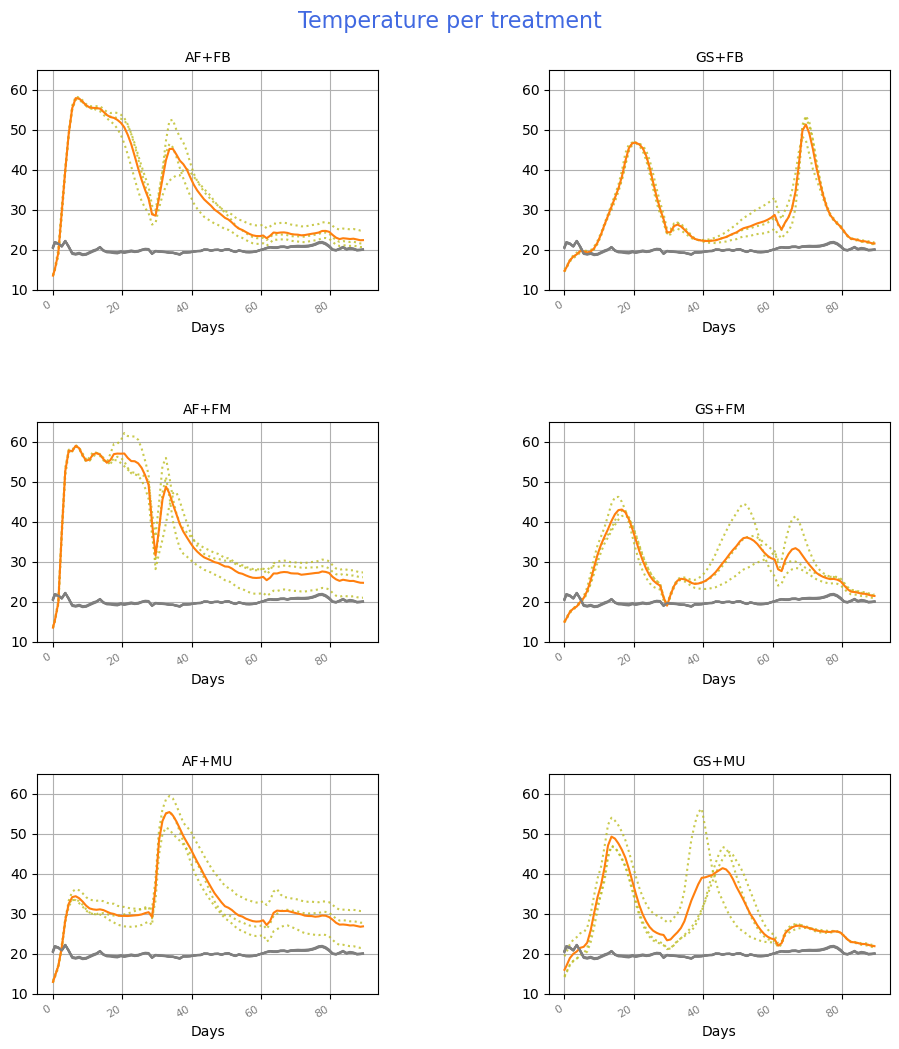

In [41]:
plot_temperature_for_multiple_columns(temperature_df_transformed, 'Hours')